In [1]:
import lightgbm as lgb
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, make_scorer
from sklearn.model_selection import GridSearchCV



In [4]:
df=pd.read_csv("secom_lgb.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.212406,-0.330435,1.962264,1.638889,0.503669,-1.030252,1.071429,-0.765677,-1.492355,...,0.353576,0.203070,0.093023,0.029451,-0.435966,0.477294,0.732305,-0.251416,-0.278261,-0.304514
1,0,0.933964,-1.321739,-1.088534,1.555556,1.487061,-1.112605,0.714286,-0.752750,-1.467890,...,-0.331984,-0.522928,0.418605,0.546392,-0.026852,0.198261,0.092770,-0.113250,-0.550725,-0.860221
2,0,-0.257246,-0.321739,-1.011611,1.166667,1.389726,-0.615966,-1.357143,0.610561,-0.833028,...,-0.998650,-0.938245,-0.255814,0.010309,3.779256,-0.410046,-1.907230,0.475651,-0.067633,-1.282571
3,0,0.226982,-0.660870,1.013062,1.555556,0.320587,-0.602521,-0.500000,-0.544554,-0.740061,...,-0.510121,-0.510472,0.000000,0.010309,-2.142383,2.615932,-1.825834,-0.260476,0.948792,0.414045
4,0,-0.729791,0.443478,0.387518,1.361111,0.038625,-1.112605,0.714286,-0.752750,-1.467890,...,0.010796,-0.007599,-1.209302,0.030928,4.411632,-1.157181,1.011375,0.323896,-0.568116,-1.987431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,-0.260918,-0.026087,0.767779,-0.194444,-0.802626,0.268908,0.428571,0.533553,0.143119,...,0.008097,0.014339,-0.674419,-0.309278,-0.353616,0.340324,-0.089400,-0.480181,-0.786473,0.733834
1563,1,0.457747,-0.539130,-0.635704,1.055556,-1.043646,0.228571,2.071429,0.390539,0.000612,...,-1.346829,-0.114207,1.860465,0.113402,-0.559263,0.476459,9.216801,0.169875,0.879227,-0.423207
1564,1,-0.667594,-0.373913,-0.341074,-0.361111,-0.899189,-1.232773,-0.357143,-0.570682,-1.486239,...,-0.124157,-0.201475,-0.744186,-0.288660,-0.991111,0.920971,-0.050640,-0.070215,0.206763,0.094760
1565,1,1.795160,-0.530435,0.557329,0.416667,0.537659,-0.010084,-0.071429,0.052255,0.061162,...,-0.124157,-0.289747,0.465116,1.020619,-1.165949,1.502700,0.666414,-1.832390,0.805797,0.000000


In [5]:
X = df.drop("Pass/Fail", axis=1)
y = df["Pass/Fail"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

## SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=12)
# train 데이터에서 오버샘플링 시키기
x_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 오버샘플링 적용 후 데이터 레이블 개수 살펴보기
print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', x_train_over.shape, y_train_over.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_train_over).value_counts())

오버샘플링 전 : (1253, 61) (1253,)

오버샘플링 후 : (2340, 61) (2340,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 0    1170
1    1170
dtype: int64


Class=0, n=1170 (74.665%)
Class=1, n=83 (5.297%)


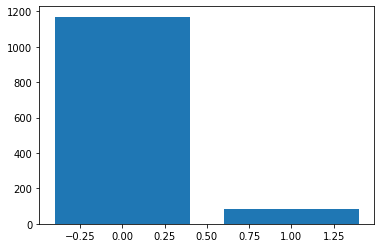

In [9]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
#plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=1170 (74.665%)
Class=1, n=1170 (74.665%)


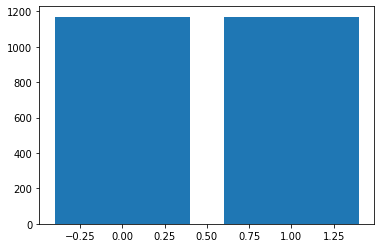

In [10]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(y_train_over)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
 
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [11]:
df=pd.DataFrame(y_train_over)
df.columns = ['Pass/Fail']
df=pd.concat([df,x_train_over], axis=1)
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.706314,-0.086957,0.114659,0.055556,-0.022402,-1.036134,-0.500000,0.596810,-1.195719,...,0.080972,0.553219,-0.627907,-0.443299,-0.457538,0.107099,-0.008005,1.048698,0.334300,-0.654322
1,0,0.664701,-1.113043,2.449927,0.888889,-0.693704,-0.664706,0.500000,-0.181518,-0.609174,...,0.000000,-0.450913,0.069767,-0.958763,-1.512817,1.294341,0.565639,0.518686,0.056039,0.093523
2,0,0.063310,0.417391,0.571843,-0.277778,0.294322,-0.502521,1.714286,-0.209021,-0.537003,...,0.423752,0.619069,-0.069767,0.896907,0.184220,0.020035,0.472615,-0.174405,-0.527536,-0.049568
3,0,-1.226370,0.495652,0.081277,0.027778,0.322132,1.671429,-0.571429,2.414741,1.540673,...,-0.018893,-0.095871,0.069767,0.587629,-0.655854,0.637943,0.546259,0.935447,0.604831,1.931719
4,0,-0.325452,0.017391,0.651669,1.027778,0.841251,0.673109,0.000000,0.000000,0.820795,...,0.016194,0.102378,-0.348837,-0.711340,-0.341716,0.399962,-0.166920,0.305776,-0.233816,0.577946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,1,-0.170615,-0.047018,0.470007,-0.096118,-0.789392,0.251179,0.408344,0.437758,0.143292,...,-0.090883,-0.103340,-0.756739,-0.345771,-0.596144,0.569258,-0.052630,-0.539511,-0.586468,0.506785
2336,1,-0.564113,-1.291353,-0.030781,0.492714,-2.112862,0.301101,0.530111,-0.161183,0.457339,...,1.118692,1.191772,0.314635,1.570098,0.744836,2.659637,1.222339,-1.088461,-0.730026,0.355096
2337,1,0.705307,0.589266,0.563737,0.543554,0.686271,0.579606,0.794532,0.345923,0.507789,...,0.383997,0.199895,0.687626,-0.053743,2.427032,0.571956,0.428687,0.767308,-1.094007,-0.424844
2338,1,-0.197445,0.201088,-0.145867,0.361438,0.203297,0.605670,0.534084,0.010689,0.569496,...,-0.684558,-0.801988,-1.914922,0.900308,3.322713,-0.935736,-0.504979,1.461198,0.497318,-0.570961


In [12]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1638, 61) (702, 61) (1638, 1) (702, 1)


In [18]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)

lgbm_wrapper = lgb.LGBMClassifier(n_estimators = 400) 
#LGBM 의 조기 중단 수행 설정
evals = [(test_x, test_y)]
# params 의 dict 형태로 주지 않고, 직접 설정
lgbm_wrapper.fit(train_x,train_y, early_stopping_rounds = 100, eval_metric = 'logless', eval_set= evals , verbose = True)
preds = lgbm_wrapper.predict(test_x)
pred_proba = lgbm_wrapper.predict_proba(test_x)[:,1]
# 약 98.15 의 정확도를 가지는 것을 볼 수 있다.
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[1]	valid_0's binary_logloss: 0.639448
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.594714
[3]	valid_0's binary_logloss: 0.555329
[4]	valid_0's binary_logloss: 0.522969
[5]	valid_0's binary_logloss: 0.492992
[6]	valid_0's binary_logloss: 0.465913
[7]	valid_0's binary_logloss: 0.438701
[8]	valid_0's binary_logloss: 0.415426
[9]	valid_0's binary_logloss: 0.395912
[10]	valid_0's binary_logloss: 0.374841
[11]	valid_0's binary_logloss: 0.358932
[12]	valid_0's binary_logloss: 0.342977
[13]	valid_0's binary_logloss: 0.327796
[14]	valid_0's binary_logloss: 0.314438
[15]	valid_0's binary_logloss: 0.30171
[16]	valid_0's binary_logloss: 0.289986
[17]	valid_0's binary_logloss: 0.278825
[18]	valid_0's binary_logloss: 0.270269
[19]	valid_0's binary_logloss: 0.258919
[20]	valid_0's binary_logloss: 0.249277
[21]	valid_0's binary_logloss: 0.24354
[22]	valid_0's binary_logloss: 0.234075
[23]	valid_0's binary_logloss: 0.22727
[24]	valid_0's binary_logloss

In [19]:
from sklearn.metrics import classification_report
y_pred = lgb_clf.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       351
           1       0.98      0.98      0.98       351

    accuracy                           0.98       702
   macro avg       0.98      0.98      0.98       702
weighted avg       0.98      0.98      0.98       702



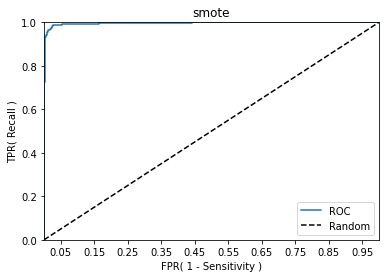

In [21]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, lgb_clf.predict_proba(test_x)[:, 1] )

## ADASYN
#### SMOTE의 개선된 버전이다. 동일한 프로세스를 진행한 후 점들에 임의의 작은 값을 더해줌으로써 조금 더 사실적인 데이터가 생성된다. 즉 모든 표본이 약간 더 분산된다.

In [22]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE

print('Original dataset shape %s' % Counter(y_train))

ada = ADASYN(random_state=12)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

print('오버샘플링 전 :', X_train.shape, y_train.shape)
print()
print('오버샘플링 후 :', X_res.shape, y_res.shape)
print()
print('오버샘플링 전 레이블 분포 :\n', pd.Series(y_train).value_counts())
print()
print('오버샘플링 후 레이블 분포 :\n', pd.Series(y_res).value_counts())

Original dataset shape Counter({0: 1170, 1: 83})
Resampled dataset shape Counter({1: 1202, 0: 1170})
오버샘플링 전 : (1253, 61) (1253,)

오버샘플링 후 : (2372, 61) (2372,)

오버샘플링 전 레이블 분포 :
 0    1170
1      83
dtype: int64

오버샘플링 후 레이블 분포 :
 1    1202
0    1170
dtype: int64


In [23]:
df=pd.DataFrame(y_res)
df.columns = ['Pass/Fail']
df=pd.concat([df,X_res], axis=1)
df

,Pass/Fail,v0,v10,v102,v103,v120,v122,v124,v125,v127,...,v575,v577,v582,v587,v59,v65,v75,v82,v86,v90
0,0,0.706314,-0.086957,0.114659,0.055556,-0.022402,-1.036134,-0.500000,0.596810,-1.195719,...,0.080972,0.553219,-0.627907,-0.443299,-0.457538,0.107099,-0.008005,1.048698,0.334300,-0.654322
1,0,0.664701,-1.113043,2.449927,0.888889,-0.693704,-0.664706,0.500000,-0.181518,-0.609174,...,0.000000,-0.450913,0.069767,-0.958763,-1.512817,1.294341,0.565639,0.518686,0.056039,0.093523
2,0,0.063310,0.417391,0.571843,-0.277778,0.294322,-0.502521,1.714286,-0.209021,-0.537003,...,0.423752,0.619069,-0.069767,0.896907,0.184220,0.020035,0.472615,-0.174405,-0.527536,-0.049568
3,0,-1.226370,0.495652,0.081277,0.027778,0.322132,1.671429,-0.571429,2.414741,1.540673,...,-0.018893,-0.095871,0.069767,0.587629,-0.655854,0.637943,0.546259,0.935447,0.604831,1.931719
4,0,-0.325452,0.017391,0.651669,1.027778,0.841251,0.673109,0.000000,0.000000,0.820795,...,0.016194,0.102378,-0.348837,-0.711340,-0.341716,0.399962,-0.166920,0.305776,-0.233816,0.577946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,1,0.282578,-1.506618,-0.854322,1.608414,-0.082909,-0.785725,0.317961,-0.308922,-0.664487,...,-0.568636,-0.768745,0.922872,-0.495190,1.172392,2.063844,0.031916,-0.460063,0.500425,-1.493085
2368,1,0.540806,0.467829,-0.483065,1.118872,0.766510,-0.929065,-0.307936,-0.489480,-0.841026,...,-0.732666,-0.741408,0.312956,0.743283,0.762544,2.815866,-0.101865,-0.243678,0.032519,-0.309079
2369,1,0.581099,0.970076,-0.455454,1.201638,0.336970,-0.857801,-0.193336,-0.543124,-0.701544,...,-0.282927,-0.420277,0.121067,0.745646,1.033921,2.424081,-0.148949,-0.183458,0.108255,-0.168743
2370,1,0.474792,-0.079104,-0.166151,0.894565,0.698327,-0.948416,-0.415980,-0.471827,-0.976362,...,-0.754029,-0.711850,0.467185,0.718915,0.380676,2.425633,0.172172,-0.209832,0.100677,-0.298428


In [24]:
feature_columns = df.columns.difference(["Pass/Fail"])
x = df[feature_columns]
y = df[["Pass/Fail"]]
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1660, 61) (712, 61) (1660, 1) (712, 1)


In [25]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)

lgbm_wrapper = lgb.LGBMClassifier(n_estimators = 400) 
#LGBM 의 조기 중단 수행 설정
evals = [(test_x, test_y)]
# params 의 dict 형태로 주지 않고, 직접 설정
lgbm_wrapper.fit(train_x,train_y, early_stopping_rounds = 100, eval_metric = 'logless', eval_set= evals , verbose = True)
preds = lgbm_wrapper.predict(test_x)
pred_proba = lgbm_wrapper.predict_proba(test_x)[:,1]
# 약 97.75 의 정확도를 가지는 것을 볼 수 있다.
print(" 정 확 도 : {0:.4f}".format(accuracy_score(test_y,preds)))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[1]	valid_0's binary_logloss: 0.635308
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.590277
[3]	valid_0's binary_logloss: 0.551244
[4]	valid_0's binary_logloss: 0.517983
[5]	valid_0's binary_logloss: 0.491034
[6]	valid_0's binary_logloss: 0.467289
[7]	valid_0's binary_logloss: 0.443118
[8]	valid_0's binary_logloss: 0.418465
[9]	valid_0's binary_logloss: 0.394469
[10]	valid_0's binary_logloss: 0.375851
[11]	valid_0's binary_logloss: 0.358848
[12]	valid_0's binary_logloss: 0.342385
[13]	valid_0's binary_logloss: 0.325232
[14]	valid_0's binary_logloss: 0.30979
[15]	valid_0's binary_logloss: 0.296245
[16]	valid_0's binary_logloss: 0.285882
[17]	valid_0's binary_logloss: 0.273799
[18]	valid_0's binary_logloss: 0.264025
[19]	valid_0's binary_logloss: 0.255041
[20]	valid_0's binary_logloss: 0.245239
[21]	valid_0's binary_logloss: 0.238497
[22]	valid_0's binary_logloss: 0.228121
[23]	valid_0's binary_logloss: 0.219926
[24]	valid_0's binary_loglo

In [26]:
from sklearn.metrics import classification_report
y_pred = lgb_clf.predict(test_x)
accuracy_score(test_y, y_pred)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       351
           1       0.96      0.98      0.97       361

    accuracy                           0.97       712
   macro avg       0.97      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712



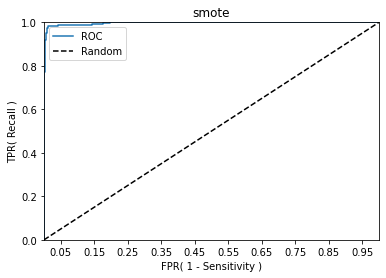

In [27]:
def roc_curve_plot(test_y , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(test_y ,pred_proba_c1)

  
    plt.plot(fprs , tprs, label='ROC')
   
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  

    plt.title('smote')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
  
roc_curve_plot(test_y, lgb_clf.predict_proba(test_x)[:, 1] )